# Imports

In [2]:
import numpy as np
import pandas as pd
import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

# Add the parent folder to sys.path
sys.path.append(os.path.abspath(os.path.join('..')))
import src.data_processing as dpr
import src.feature_engineering as fen

# Load Data

In [3]:
train_data = pd.read_csv("../data/raw/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("../data/raw/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [6]:
# Create copies
titanic_train = train_data.copy()
titanic_test = test_data.copy()

# Data Exploration

### Missing Values and Data Types

In [7]:
dpr.describe_dataframe(titanic_train)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,891,1,int64,Numerical
Survived,0,0.000000,549,0.616162,2,0,int64,Categorical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,891,"Abbing, Mr. Anthony",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,177,0.198653,0,0.000000,88,24.0,float64,Numerical
SibSp,0,0.000000,608,0.682379,7,0,int64,Categorical
Parch,0,0.000000,678,0.760943,7,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,681,1601,object,Categorical
Fare,0,0.000000,15,0.016835,248,8.05,float64,Numerical


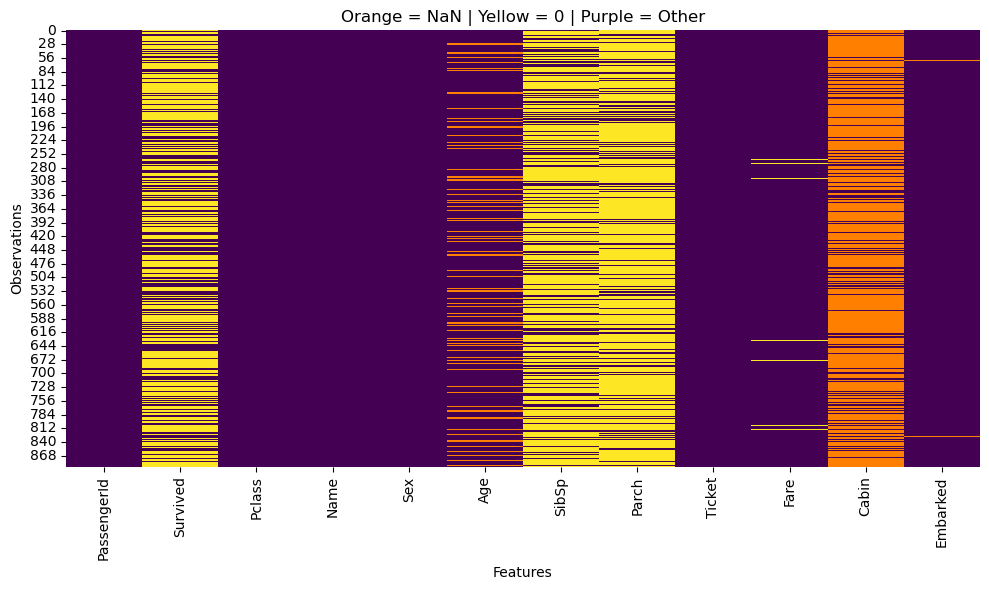

In [8]:
dpr.plot_missing_values(titanic_train, show_zeros=True)

In [9]:
dpr.describe_dataframe(titanic_test)

,Missing Count,Missing Percentage,Zero Count,Zero Percentage,Distinct Values,Mode,Data Type,Feature Type
PassengerId,0,0.000000,0,0.000000,418,892,int64,Numerical
Pclass,0,0.000000,0,0.000000,3,3,int64,Categorical
Name,0,0.000000,0,0.000000,418,"Abbott, Master. Eugene Joseph",object,Categorical
Sex,0,0.000000,0,0.000000,2,male,object,Categorical
Age,86,0.205742,0,0.000000,79,21.0,float64,Numerical
SibSp,0,0.000000,283,0.677033,7,0,int64,Categorical
Parch,0,0.000000,324,0.775120,8,0,int64,Categorical
Ticket,0,0.000000,0,0.000000,363,PC 17608,object,Categorical
Fare,1,0.002392,2,0.004785,169,7.75,float64,Numerical
Cabin,327,0.782297,0,0.000000,76,B57 B59 B63 B66,object,Categorical


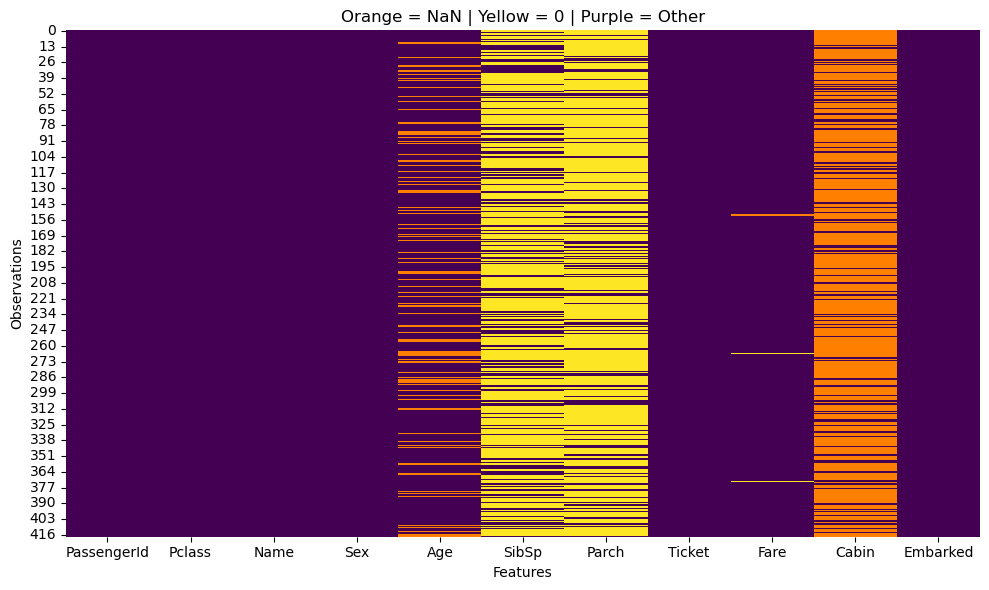

In [10]:
dpr.plot_missing_values(titanic_test, show_zeros=True)

### Target Distribution

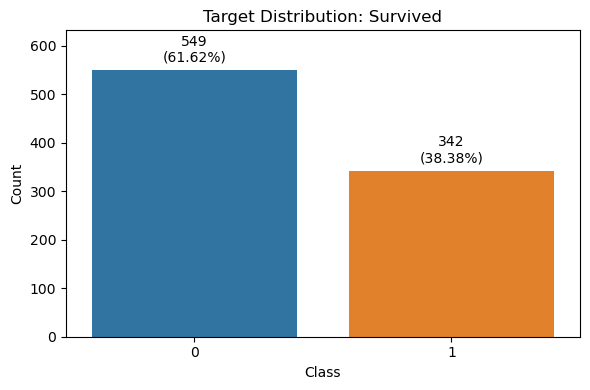

In [11]:
dpr.plot_binary_target_with_stats(titanic_train["Survived"], target_col="Survived")


### Feature Distributions

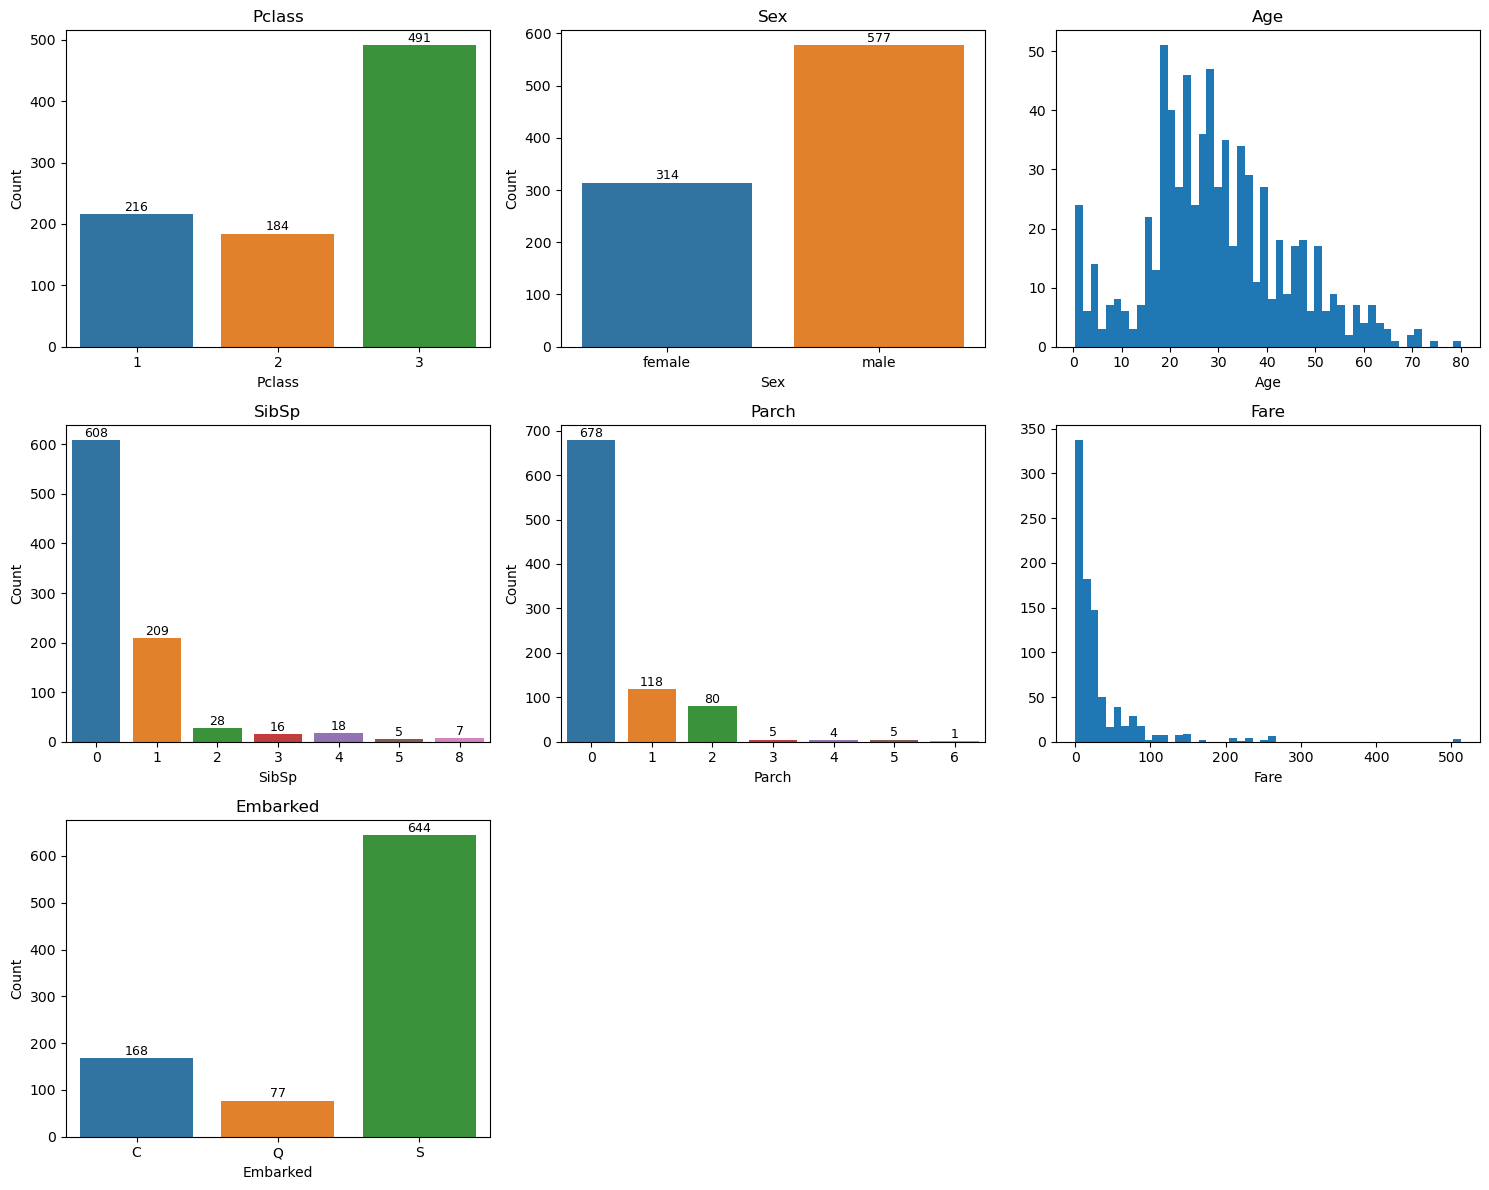

In [12]:
dpr.show_feature_distributions(
    titanic_train,
    titanic_train.columns,
    n_cols=3,
    cat_max_unique=10,
    exclude_cols=["PassengerId", "Survived"]
)

### Survival Rate per Feature

Categorical x Target

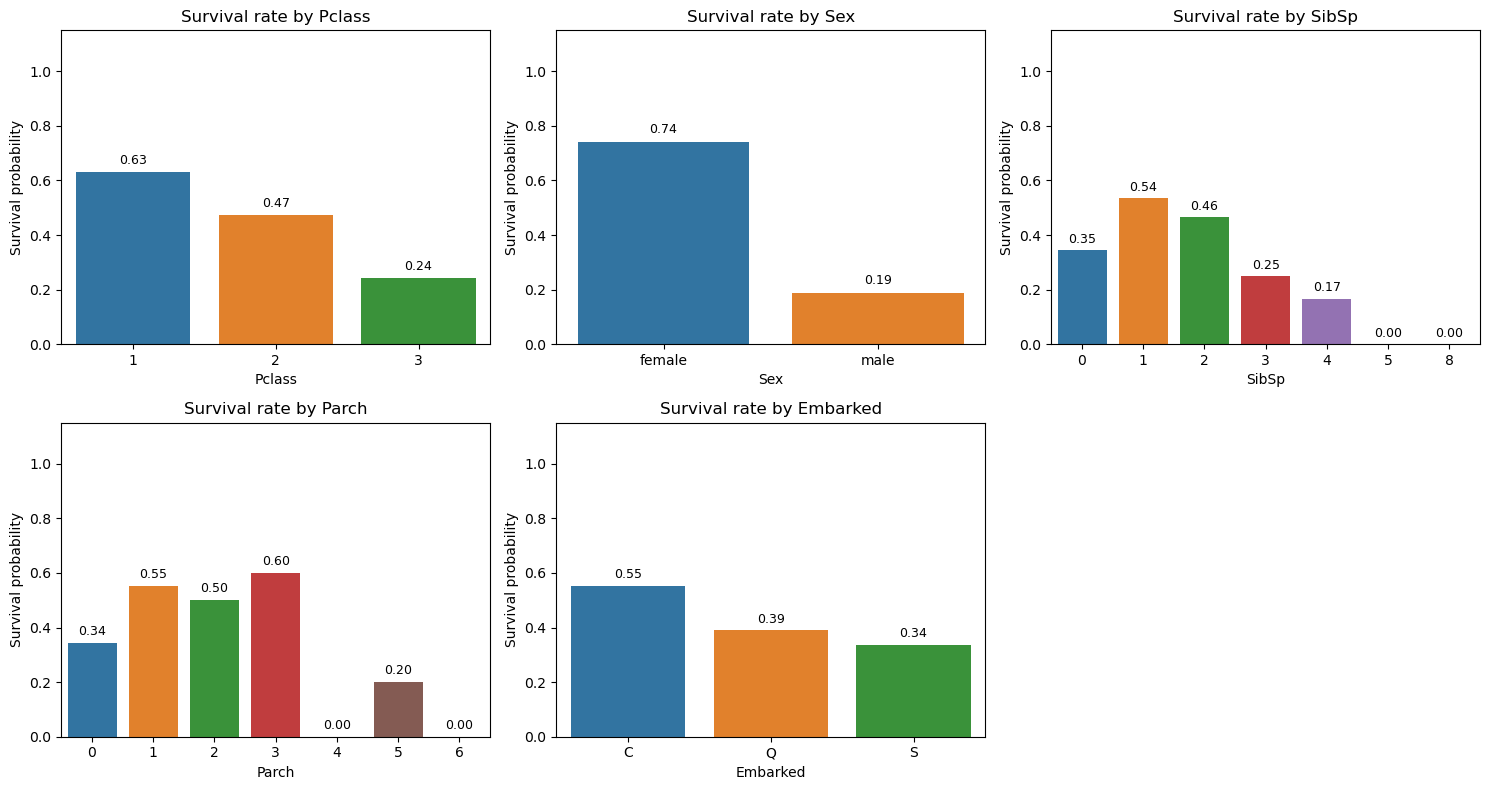

In [13]:
dpr.plot_survival_rate_categorical(
    titanic_train,
    titanic_train["Survived"],
    exclude_cols=["Survived", "PassengerId", "Name", "Ticket", "Cabin"]
)

Numerical x Target

Age

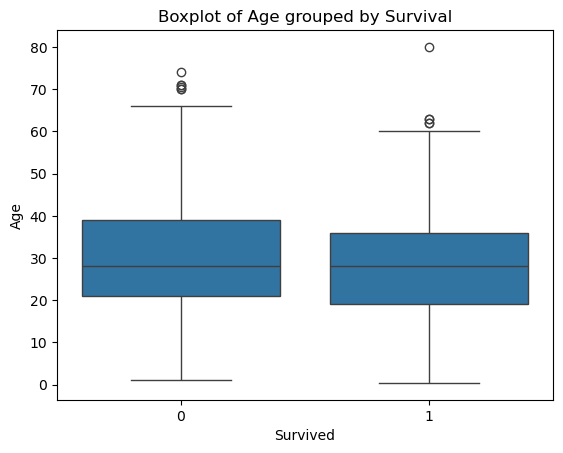

Median Age by Survival:
Survived
0    28.0
1    28.0
Name: Age, dtype: float64


In [14]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Age', data=titanic_train)
plt.title("Boxplot of Age grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Age by Survival:")
print(titanic_train.groupby("Survived")["Age"].median())

Fare

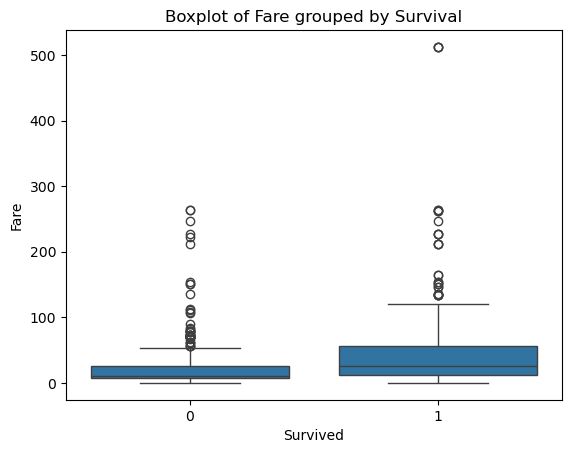

Median Fare by Survival:
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


In [15]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_train)
plt.title("Boxplot of Fare grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Fare by Survival:")
print(titanic_train.groupby("Survived")["Fare"].median())

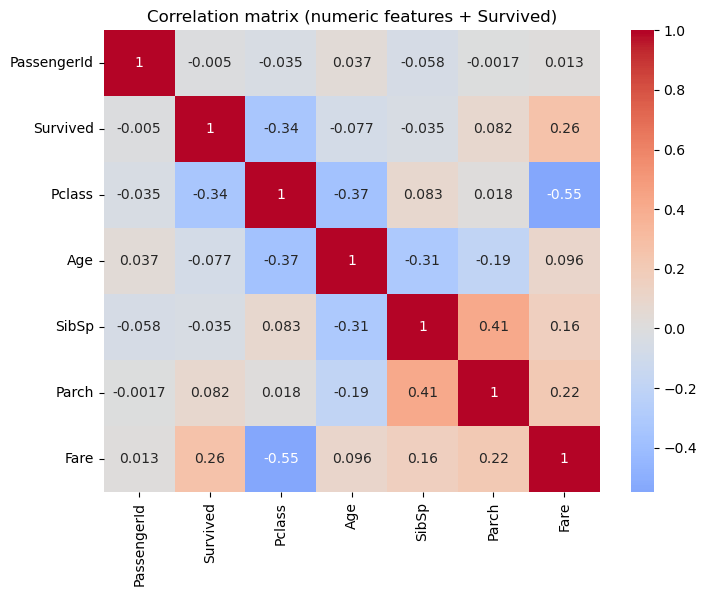

In [16]:
# Select numeric columns
numeric_cols = titanic_train.select_dtypes(include=["int64","float64"]).columns

# Compute correlation matrix
corr_matrix = titanic_train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix (numeric features + Survived)")
plt.show()

### Individual Feature Analysis + Feature Creation

##### Name

Extract Title from Name

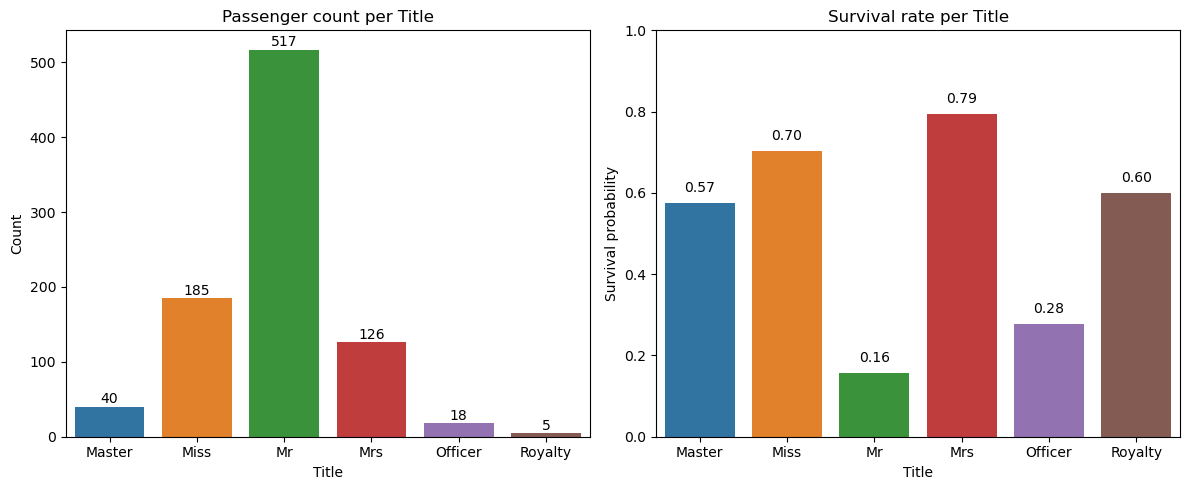

In [17]:
titanic_train = fen.extract_title(titanic_train)
dpr.plot_cat_feature_survival(titanic_train, target="Survived", bins_col="Title")

##### Age

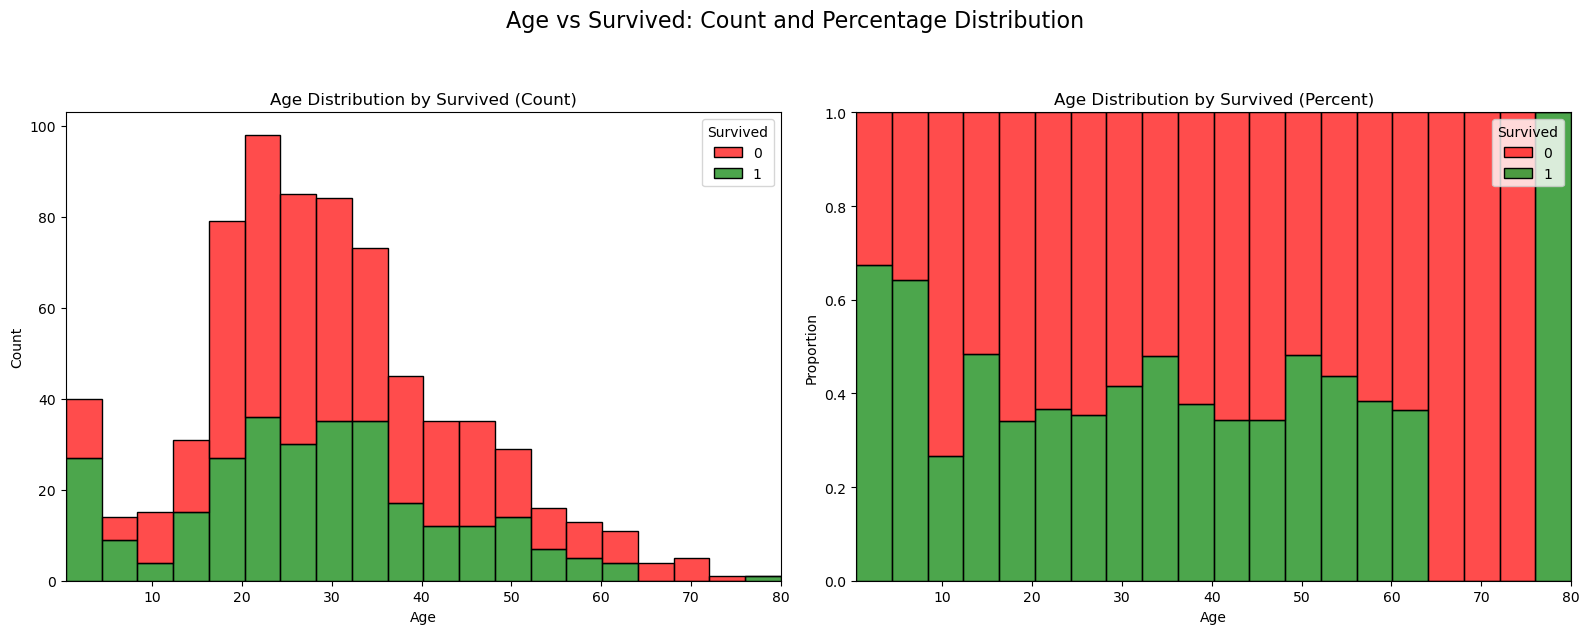

In [18]:
dpr.plot_hist_count_and_percent(
    titanic_train,
    x="Age"
)

Outlier Detection

In [19]:
# Detect Outliers per Group
outliers = dpr.detect_outliers(titanic_train, col="Age", group_cols="Survived", show=False)
outliers

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
116,117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q,Mr
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,NaN,S,Mr
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S,Officer
851,852,0,3,male,74.0,0,0,347060,7.7750,NaN,S,Mr
275,276,1,1,female,63.0,1,0,13502,77.9583,D7,S,Miss
483,484,1,3,female,63.0,0,0,4134,9.5875,NaN,S,Mrs
570,571,1,2,male,62.0,0,0,S.W./PP 752,10.5000,NaN,S,Mr
630,631,1,1,male,80.0,0,0,27042,30.0000,A23,S,Mr


Age binning

##### SibSp + Parch

New Feature - Family Size

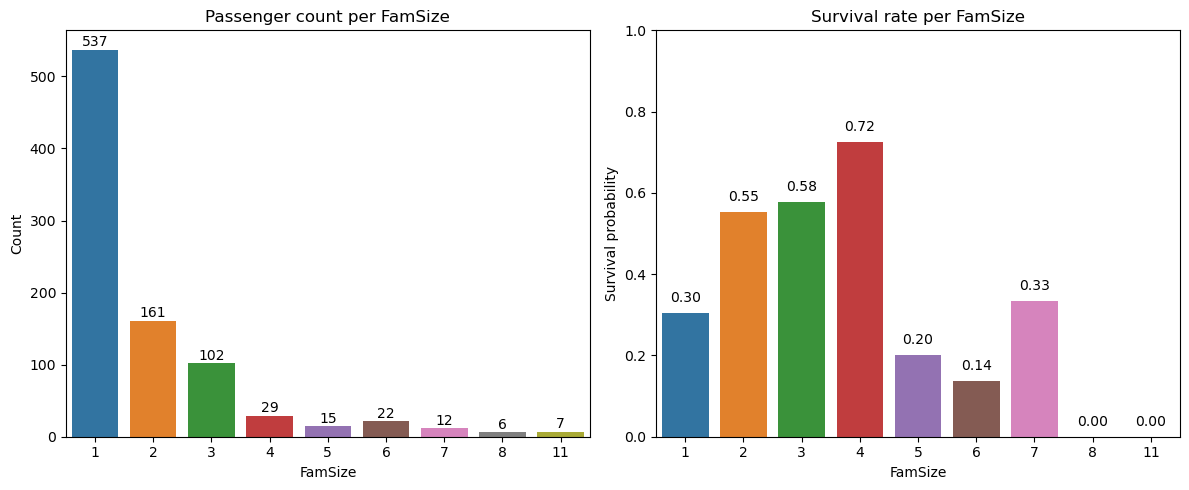

In [20]:
titanic_train = fen.get_famtype(titanic_train)
dpr.plot_cat_feature_survival(titanic_train, target="Survived", bins_col="FamSize")

New Feature - Family Type

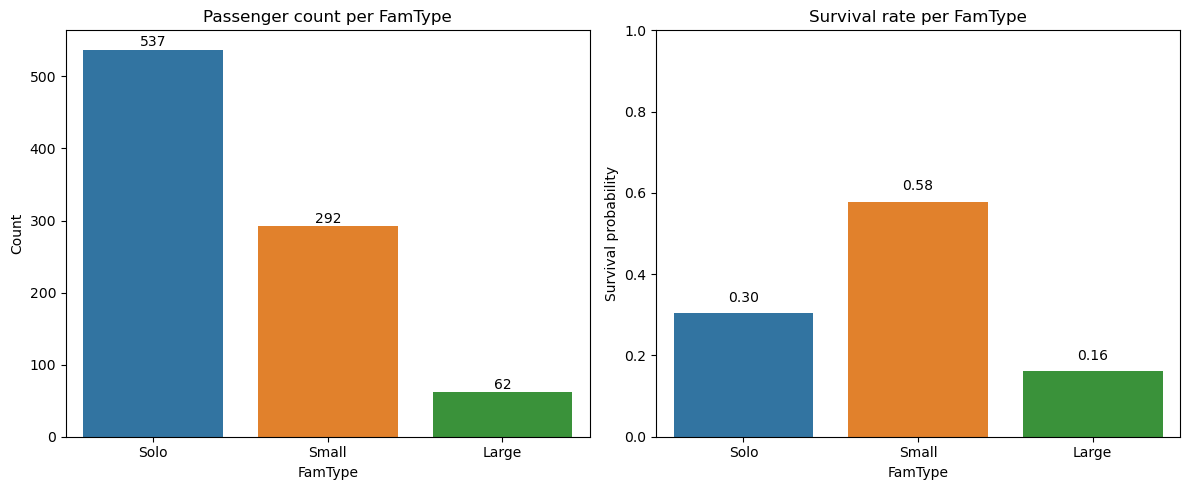

In [21]:
dpr.plot_cat_feature_survival(titanic_train, target="Survived", bins_col="FamType")

##### Ticket

Count Ticket Frequency

In [22]:
titanic_train.Ticket.value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

##### Fare

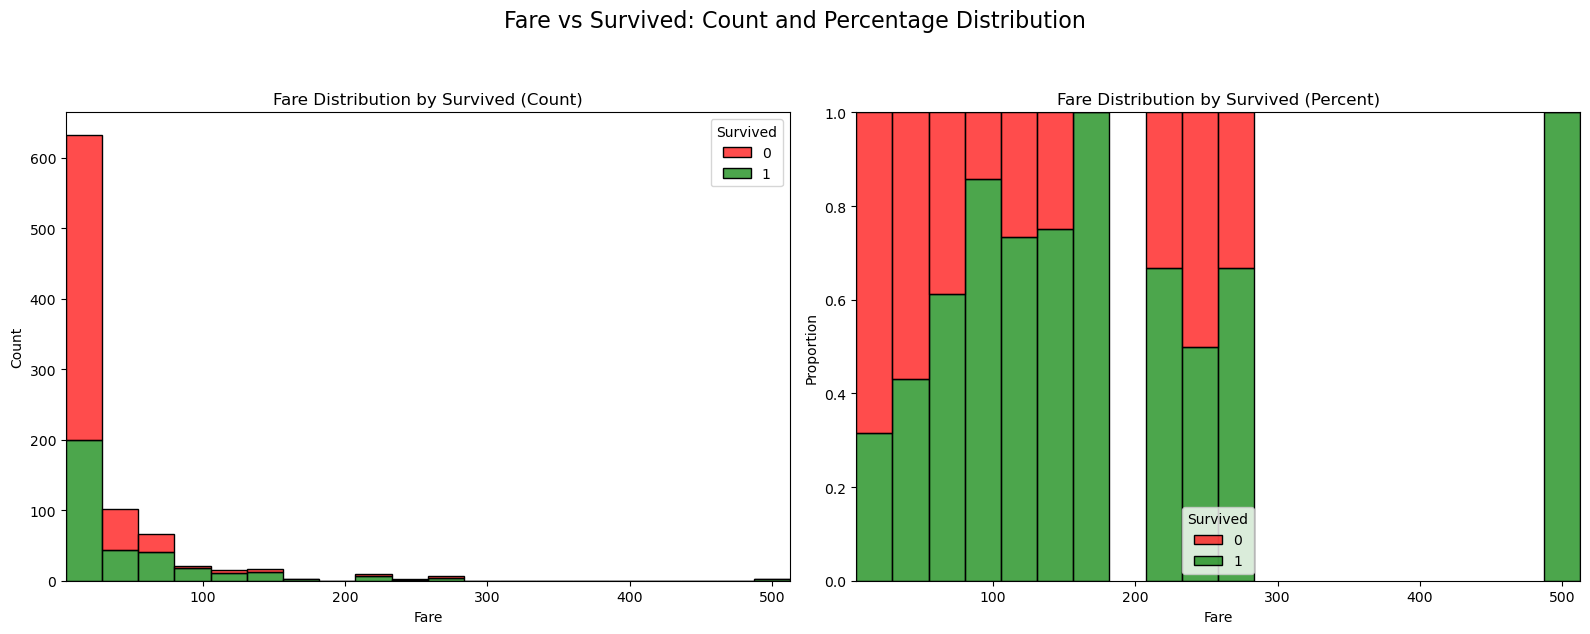

In [23]:
dpr.plot_hist_count_and_percent(
    titanic_train[titanic_train.Fare>0],
    x="Fare"
)

Divide fare into bins:
- 0
- 0<50
- 50<100
- 100<200
- 200<300
- 300+

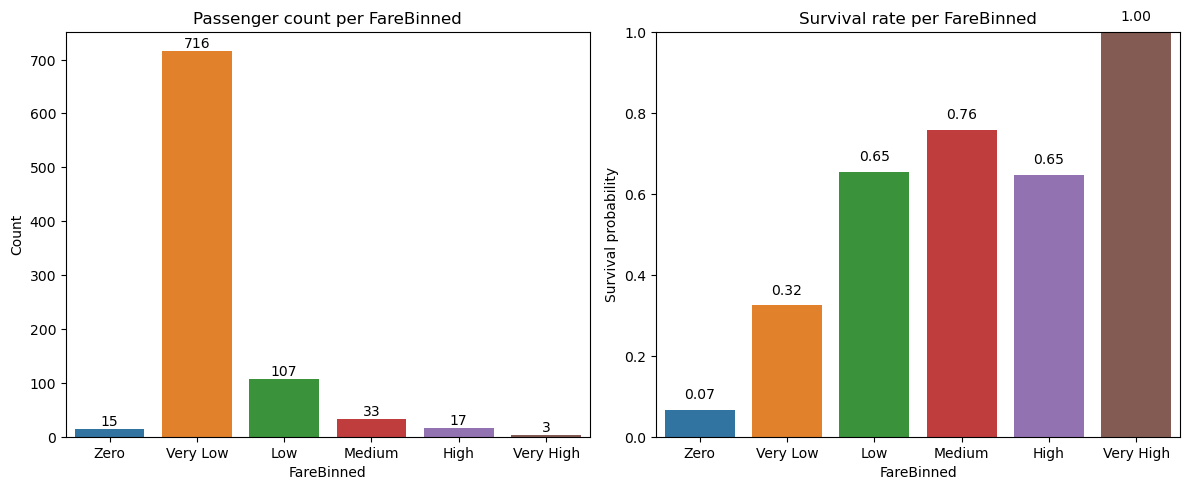

In [24]:
titanic_train = fen.bin_fare(titanic_train)  # create FareBinned column
dpr.plot_cat_feature_survival(titanic_train)


log transform?

Zero Values

In [25]:
titanic_train[(titanic_train.Fare==0)].iloc[:30]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,FamType,FareBinned
179,180,0,3,male,36.0,0,0,LINE,0.0,NaN,S,Mr,1,Solo,Zero
263,264,0,1,male,40.0,0,0,112059,0.0,B94,S,Mr,1,Solo,Zero
271,272,1,3,male,25.0,0,0,LINE,0.0,NaN,S,Mr,1,Solo,Zero
277,278,0,2,male,NaN,0,0,239853,0.0,NaN,S,Mr,1,Solo,Zero
302,303,0,3,male,19.0,0,0,LINE,0.0,NaN,S,Mr,1,Solo,Zero
413,414,0,2,male,NaN,0,0,239853,0.0,NaN,S,Mr,1,Solo,Zero
466,467,0,2,male,NaN,0,0,239853,0.0,NaN,S,Mr,1,Solo,Zero
481,482,0,2,male,NaN,0,0,239854,0.0,NaN,S,Mr,1,Solo,Zero
597,598,0,3,male,49.0,0,0,LINE,0.0,NaN,S,Mr,1,Solo,Zero
633,634,0,1,male,NaN,0,0,112052,0.0,NaN,S,Mr,1,Solo,Zero


In [26]:
print("Mean survival chance for passengers with fare=0:", round(titanic_train[titanic_train.Fare==0].Survived.mean(), 2))

Mean survival chance for passengers with fare=0: 0.07


Outlier Detection

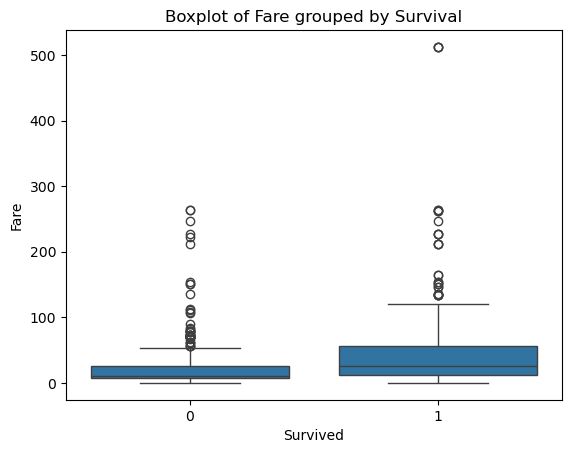

Median Fare by Survival:
Survived
0    10.5
1    26.0
Name: Fare, dtype: float64


In [27]:
# Boxplot of Age by Survived
sns.boxplot(x='Survived', y='Fare', data=titanic_train)
plt.title("Boxplot of Fare grouped by Survival")
plt.show()

# Print median Age for each Survival group
print("Median Fare by Survival:")
print(titanic_train.groupby("Survived")["Fare"].median())

# Detect Outliers per Group
outliers = dpr.detect_outliers(titanic_train, col="Fare", group_cols="Survived", show=False)

In [28]:
print(outliers.to_string())

     PassengerId  Survived  Pclass     Sex    Age  SibSp  Parch        Ticket      Fare            Cabin Embarked    Title  FamSize FamType FareBinned
27            28         0       1    male  19.00      3      2         19950  263.0000      C23 C25 C27        S       Mr        6   Large       High
34            35         0       1    male  28.00      1      0      PC 17604   82.1708              NaN        C       Mr        2   Small        Low
54            55         0       1    male  65.00      0      1        113509   61.9792              B30        C       Mr        2   Small        Low
62            63         0       1    male  45.00      1      0         36973   83.4750              C83        S       Mr        2   Small        Low
72            73         0       2    male  21.00      0      0  S.O.C. 14879   73.5000              NaN        S       Mr        1    Solo        Low
92            93         0       1    male  46.00      1      0   W.E.P. 5734   61.1750       

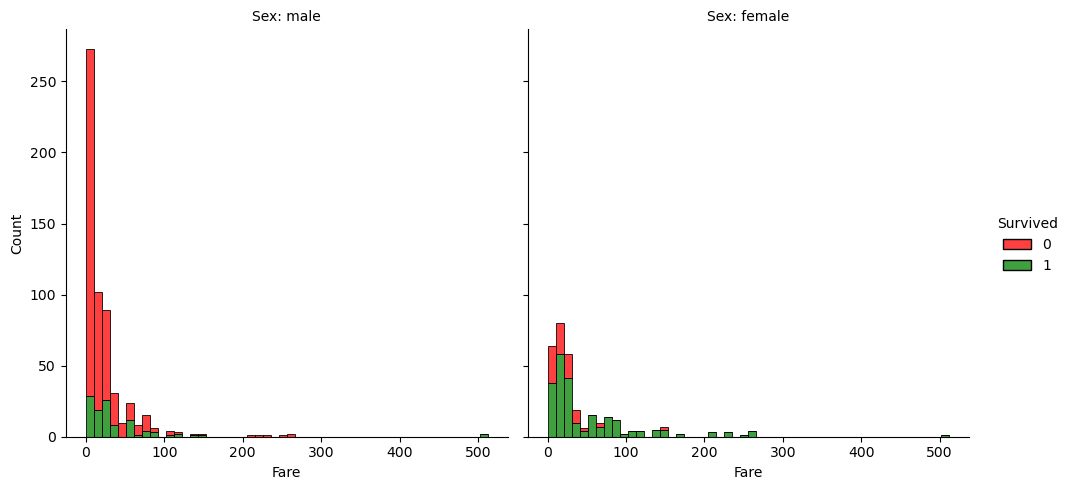

In [29]:
# FacetGrid: separate by Sex
g = sns.displot(
    data=titanic_train,
    x="Fare",
    hue="Survived",
    col="Sex",             # separate plots per Sex
    multiple="stack",      # stack survived/died within each bin
    bins=50,
    palette={0:"red", 1:"green"},
    height=5,
    aspect=1
)

g.set_axis_labels("Fare", "Count")
g.set_titles("Sex: {col_name}")
g._legend.set_title("Survived")
plt.show()


##### Cabin

Extract Deck

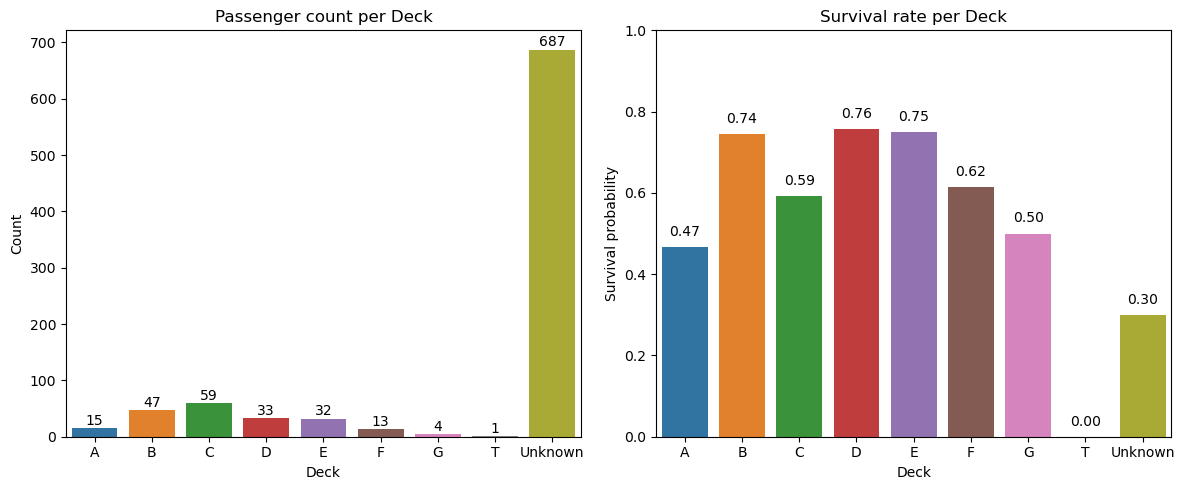

In [30]:
titanic_train = fen.extract_deck(titanic_train)
dpr.plot_cat_feature_survival(titanic_train, target="Survived", bins_col="Deck")

In [31]:
titanic_train = fen.extract_num_cabins(titanic_train)
titanic_train["NumCabins"].value_counts()

NumCabins
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

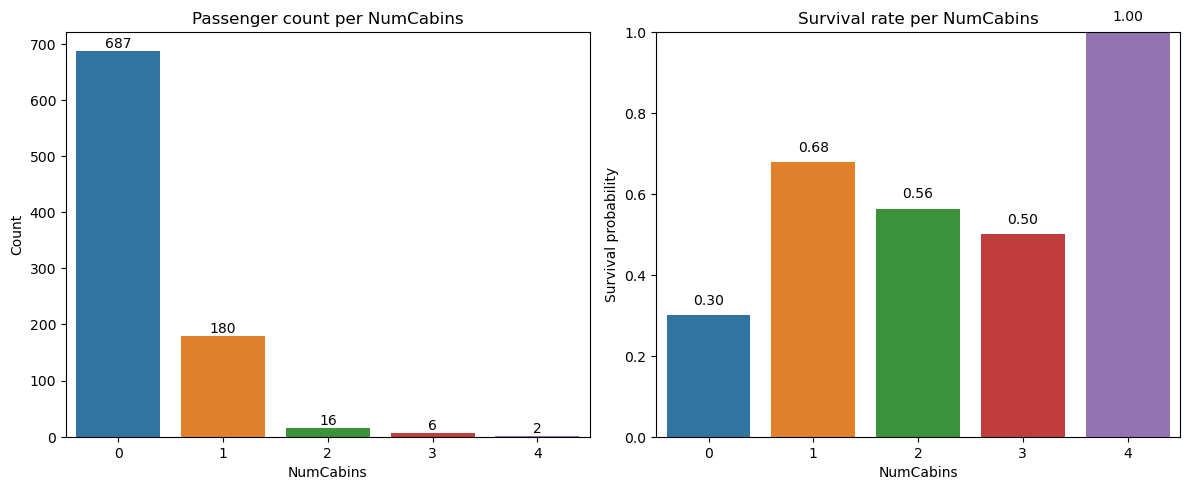

In [32]:
dpr.plot_cat_feature_survival(titanic_train, target="Survived", bins_col="NumCabins")

### Cross Feature Analysis

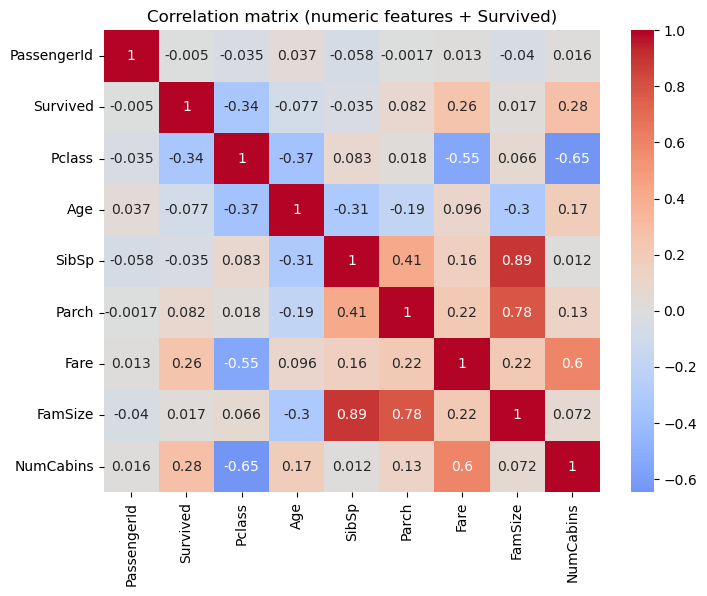

In [53]:
# Select numeric columns
numeric_cols = titanic_train.select_dtypes(include=["int64","float64"]).columns

# Compute correlation matrix
corr_matrix = titanic_train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0
)
plt.title("Correlation matrix (numeric features + Survived)")
plt.show()

In [33]:
print(titanic_train.groupby(["Embarked", "Pclass"])["Fare"].count())


Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Fare, dtype: int64


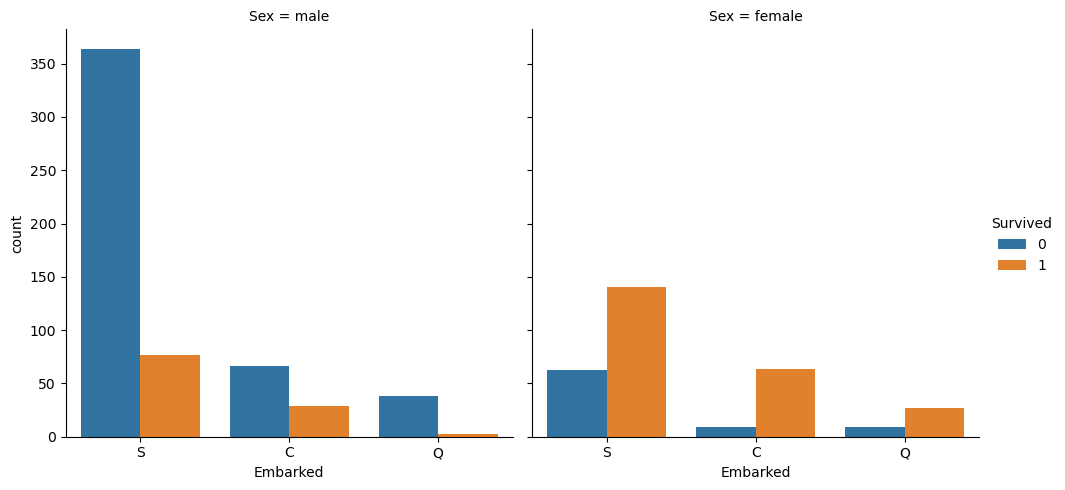

In [34]:
sns.catplot(
    x="Embarked",
    hue="Survived",
    col="Sex",
    data=titanic_train,
    kind="count",
    height=5,
    aspect=1
)
plt.show()


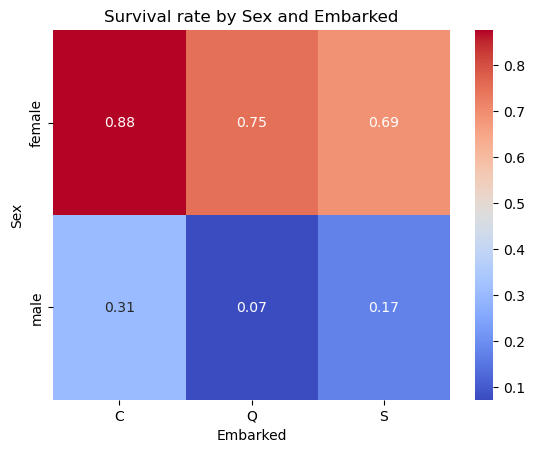

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [35]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["Embarked"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and Embarked")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["Embarked"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)

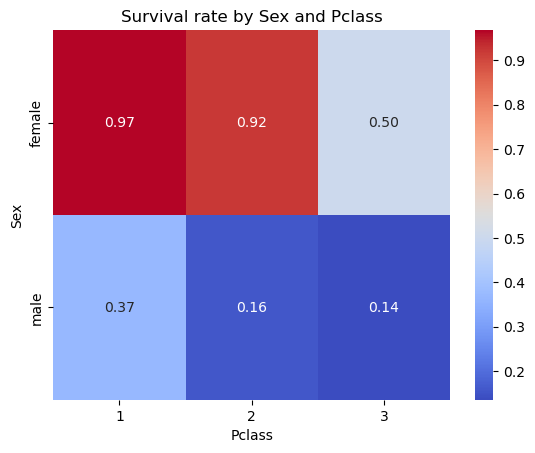

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [36]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["Pclass"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and Pclass")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["Pclass"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)


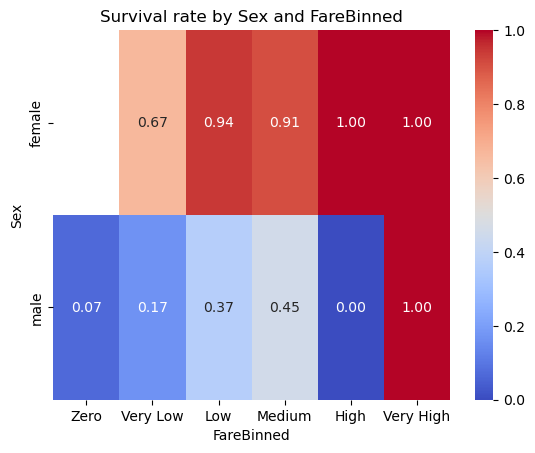

FareBinned,Zero,Very Low,Low,Medium,High,Very High
Sex,,,,,,
female,0,227,53,22,11,1
male,15,489,54,11,6,2


In [37]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["FareBinned"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and FareBinned")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["FareBinned"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)


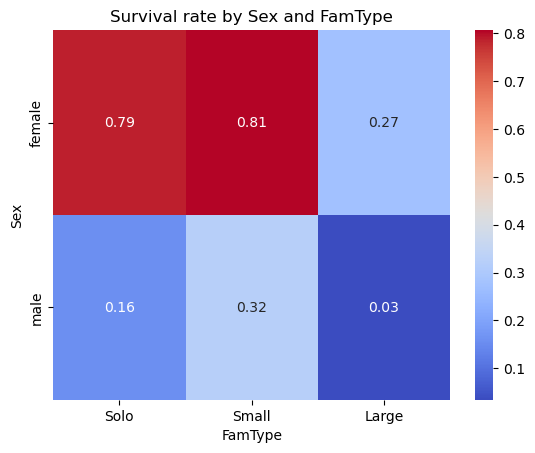

FamType,Solo,Small,Large
Sex,,,
female,126,155,33
male,411,137,29


In [38]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["FamType"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and FamType")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["FamType"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)


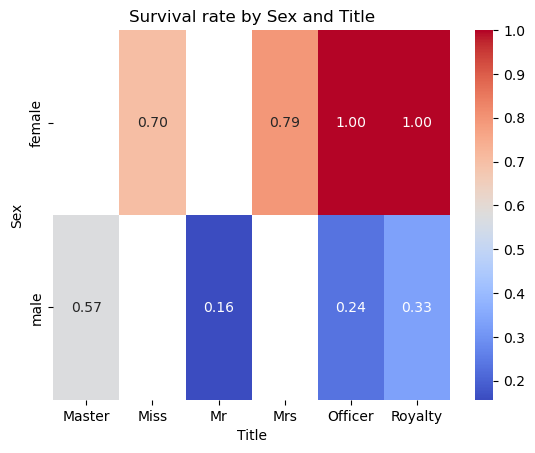

Title,Master,Miss,Mr,Mrs,Officer,Royalty
Sex,,,,,,
female,NaN,185.0,NaN,126.0,1.0,2.0
male,40.0,NaN,517.0,NaN,17.0,3.0


In [39]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["Title"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and Title")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["Title"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)


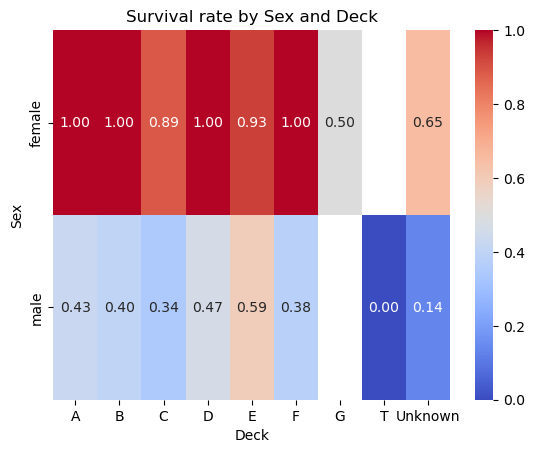

Deck,A,B,C,D,E,F,G,T,Unknown
Sex,,,,,,,,,
female,1.0,27.0,27.0,18.0,15.0,5.0,4.0,NaN,217.0
male,14.0,20.0,32.0,15.0,17.0,8.0,NaN,1.0,470.0


In [40]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["Deck"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and Deck")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["Deck"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)


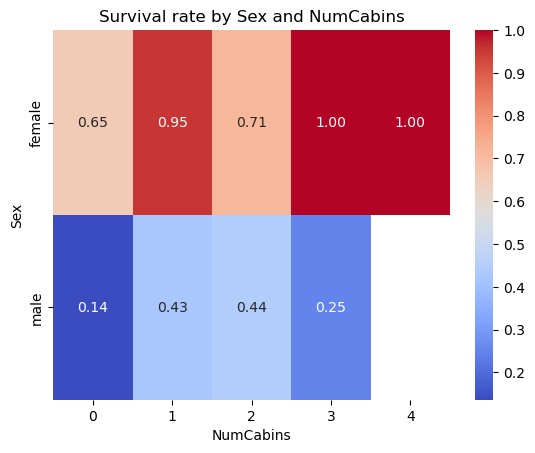

NumCabins,0,1,2,3,4
Sex,,,,,
female,217.0,86.0,7.0,2.0,2.0
male,470.0,94.0,9.0,4.0,NaN


In [41]:
ct = pd.crosstab(
    index=titanic_train["Sex"],
    columns=titanic_train["NumCabins"],
    values=titanic_train["Survived"],
    aggfunc="mean"
)
sns.heatmap(ct, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Survival rate by Sex and NumCabins")
plt.show()

pd.crosstab(
    index=titanic_train["Sex"],        # rows
    columns=titanic_train["NumCabins"], # columns
    values=titanic_train["Survived"],  # optional: numeric summary
    aggfunc="count"                     # gives survival rate
)

### Age + Sex

Outlier Detection by Age

In [42]:
# Detect Outliers per Survived/Sex group
outliers = dpr.detect_outliers(titanic_train, col="Age", group_cols=["Survived", "Sex"], show=True)


0 outliers in Age for {'Survived': np.int64(0), 'Sex': 'female'}:
Empty DataFrame
Columns: [Age, Survived, Sex]
Index: []

7 outliers in Age for {'Survived': np.int64(0), 'Sex': 'male'}:
      Age  Survived   Sex
33   66.0         0  male
96   71.0         0  male
116  70.5         0  male
493  71.0         0  male
672  70.0         0  male
745  70.0         0  male
851  74.0         0  male

0 outliers in Age for {'Survived': np.int64(1), 'Sex': 'female'}:
Empty DataFrame
Columns: [Age, Survived, Sex]
Index: []

1 outliers in Age for {'Survived': np.int64(1), 'Sex': 'male'}:
      Age  Survived   Sex
630  80.0         1  male


Boxplot

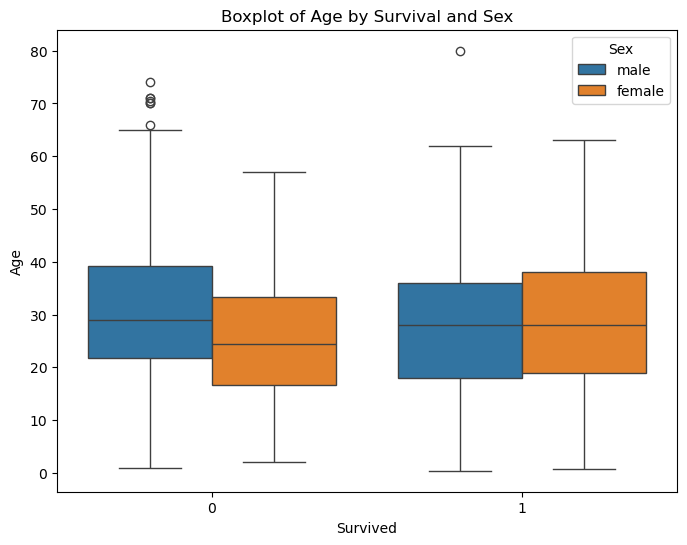

Median Age by Survival and Sex:
Survived  Sex   
0         female    24.5
          male      29.0
1         female    28.0
          male      28.0
Name: Age, dtype: float64


In [43]:
# Boxplot of Age by Survived, separated by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=titanic_train, showfliers=True)
plt.title("Boxplot of Age by Survival and Sex")
plt.ylabel("Age")
plt.xlabel("Survived")
plt.legend(title="Sex")
plt.show()

# Median Age by Survived and Sex
print("Median Age by Survival and Sex:")
print(titanic_train.groupby(["Survived", "Sex"])["Age"].median())

Distribution

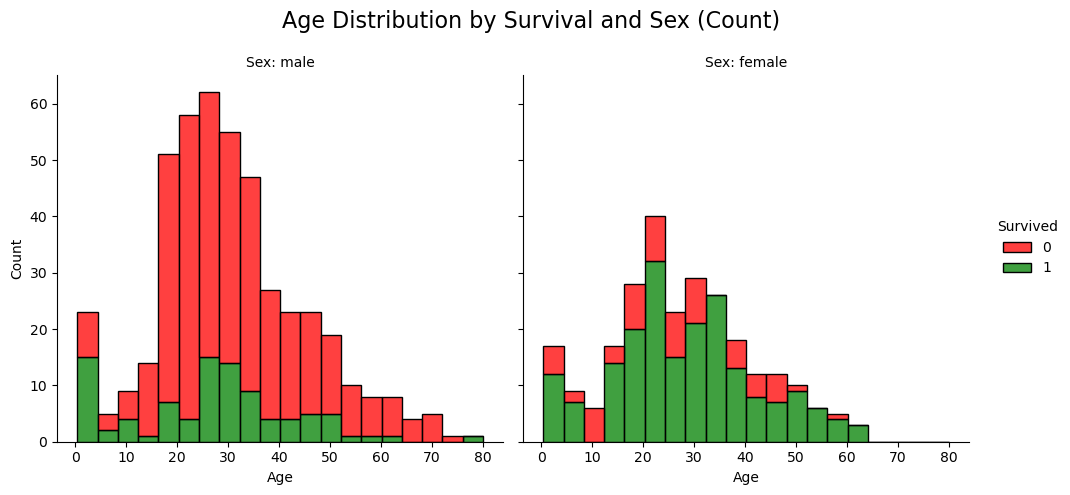

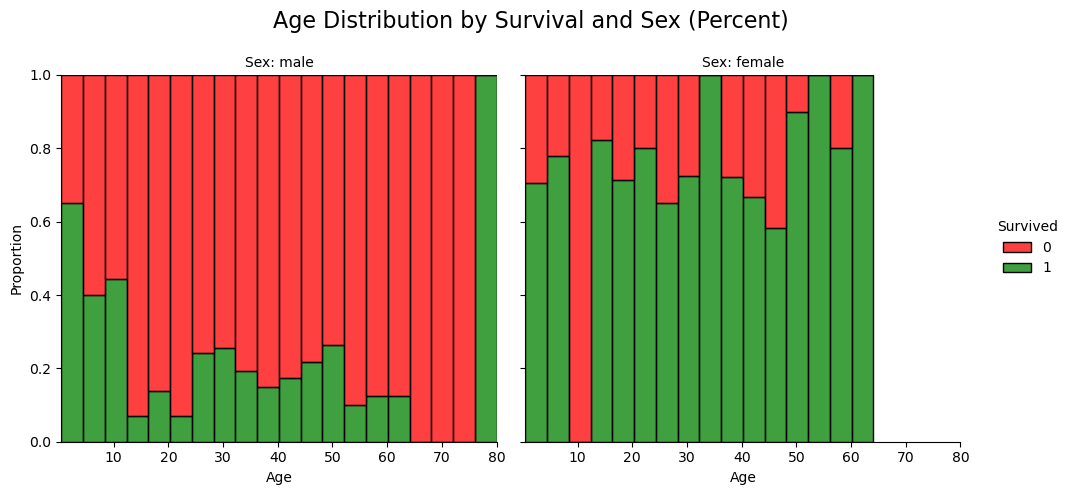

In [44]:
# Age in counts
dpr.plot_feature_survival_hist(titanic_train, feature="Age", percent=False)
# Age in percent
dpr.plot_feature_survival_hist(titanic_train, feature="Age", percent=True)

Female passengers show consistently higher survival proportions across nearly all age groups, while male survival is strongly concentrated among children.

### Fare & Sex

Outlier Detection by Age

In [45]:
# Detect Outliers per Survived/Sex group
outliers = dpr.detect_outliers(titanic_train, col="Fare", group_cols=["Survived", "Sex"], show=True)


5 outliers in Fare for {'Survived': np.int64(0), 'Sex': 'female'}:
       Fare  Survived     Sex
180   69.55         0  female
297  151.55         0  female
498  151.55         0  female
792   69.55         0  female
863   69.55         0  female

38 outliers in Fare for {'Survived': np.int64(0), 'Sex': 'male'}:
         Fare  Survived   Sex
27   263.0000         0  male
34    82.1708         0  male
54    61.9792         0  male
62    83.4750         0  male
72    73.5000         0  male
92    61.1750         0  male
102   77.2875         0  male
118  247.5208         0  male
120   73.5000         0  male
124   77.2875         0  male
139   79.2000         0  male
155   61.3792         0  male
159   69.5500         0  male
169   56.4958         0  male
201   69.5500         0  male
245   90.0000         0  male
262   79.6500         0  male
324   69.5500         0  male
332  153.4625         0  male
336   66.6000         0  male
373  135.6333         0  male
377  211.5000         0  

Boxplot

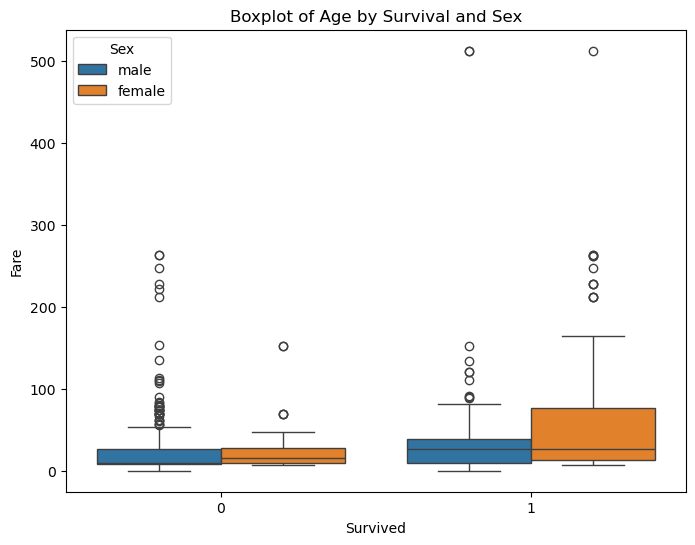

Median Fare by Survival and Sex:
Survived  Sex   
0         female    15.24580
          male       9.41665
1         female    26.00000
          male      26.28750
Name: Fare, dtype: float64


In [46]:
# Boxplot of Age by Survived, separated by Sex
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', hue='Sex', data=titanic_train, showfliers=True)
plt.title("Boxplot of Age by Survival and Sex")
plt.ylabel("Fare")
plt.xlabel("Survived")
plt.legend(title="Sex")
plt.show()

# Median Age by Survived and Sex
print("Median Fare by Survival and Sex:")
print(titanic_train.groupby(["Survived", "Sex"])["Fare"].median())

Distribution

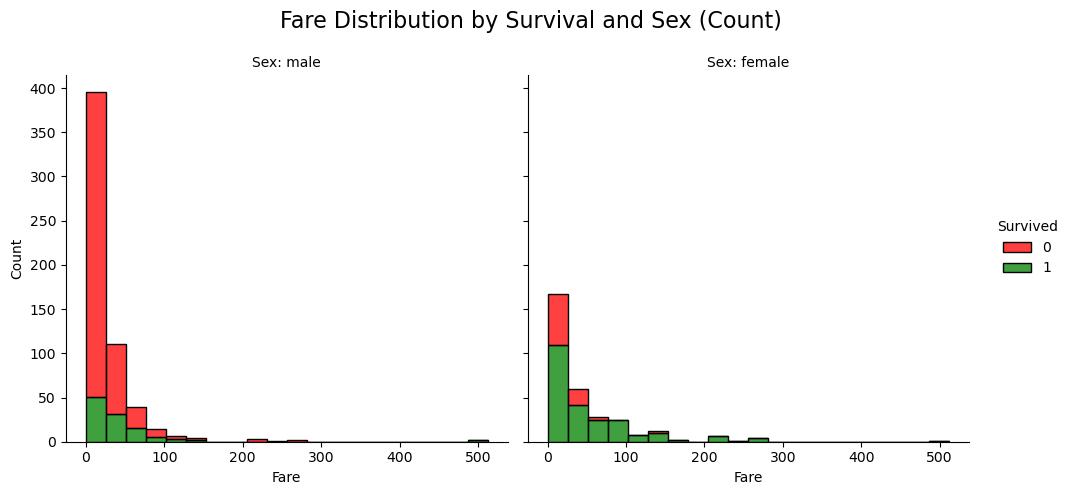

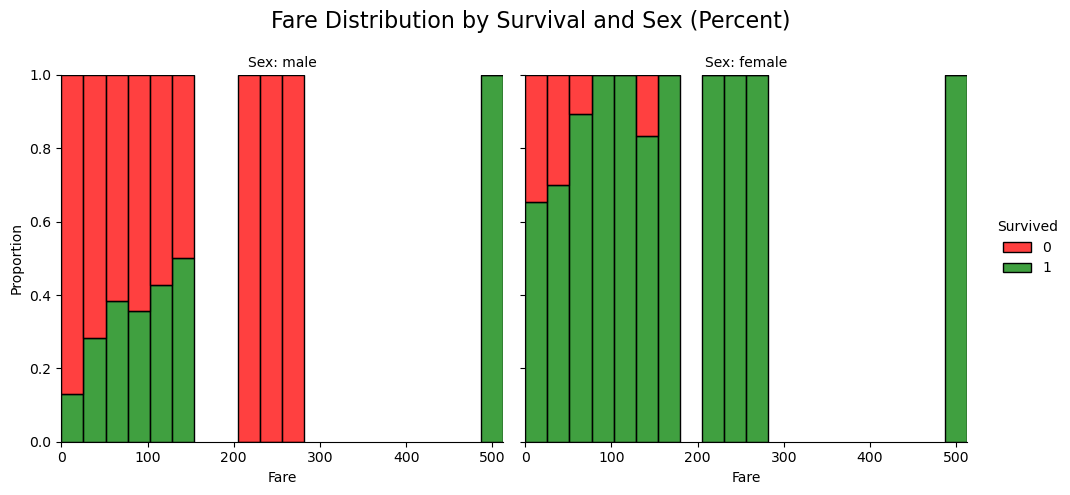

In [47]:
# Fare in counts
dpr.plot_feature_survival_hist(titanic_train, feature="Fare", percent=False)
# Fare in percent
dpr.plot_feature_survival_hist(titanic_train, feature="Fare", percent=True)

Fare > 500

In [48]:
titanic_train[titanic_train.Fare >500]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,FamType,FareBinned,Deck,NumCabins
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,1,Solo,Very High,Unknown,0
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,2,Small,Very High,B,3
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,1,Solo,Very High,B,1


200 < Fare < 500

In [49]:
titanic_train[(titanic_train.Fare > 200) & (titanic_train.Fare < 500) & (titanic_train.Sex=="male")]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,FamType,FareBinned,Deck,NumCabins
27,28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr,6,Large,High,C,3
118,119,0,1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Mr,2,Small,High,B,2
377,378,0,1,male,27.0,0,2,113503,211.5000,C82,C,Mr,3,Small,High,C,1
438,439,0,1,male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Mr,6,Large,High,C,3
527,528,0,1,male,NaN,0,0,PC 17483,221.7792,C95,S,Mr,1,Solo,High,C,1
557,558,0,1,male,NaN,0,0,PC 17757,227.5250,NaN,C,Mr,1,Solo,High,Unknown,0


In [50]:
titanic_train[(titanic_train.Fare > 200) & (titanic_train.Fare < 500) & (titanic_train.Sex=="female")]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,FamType,FareBinned,Deck,NumCabins
88,89,1,1,female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,6,Large,High,C,3
299,300,1,1,female,50.0,0,1,PC 17558,247.5208,B58 B60,C,Mrs,2,Small,High,B,2
311,312,1,1,female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,Large,High,B,4
341,342,1,1,female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,6,Large,High,C,3
380,381,1,1,female,42.0,0,0,PC 17757,227.5250,NaN,C,Miss,1,Solo,High,Unknown,0
689,690,1,1,female,15.0,0,1,24160,211.3375,B5,S,Miss,2,Small,High,B,1
700,701,1,1,female,18.0,1,0,PC 17757,227.5250,C62 C64,C,Mrs,2,Small,High,C,2
716,717,1,1,female,38.0,0,0,PC 17757,227.5250,C45,C,Miss,1,Solo,High,C,1
730,731,1,1,female,29.0,0,0,24160,211.3375,B5,S,Miss,1,Solo,High,B,1
742,743,1,1,female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,Miss,5,Large,High,B,4


### Fare & Embarked

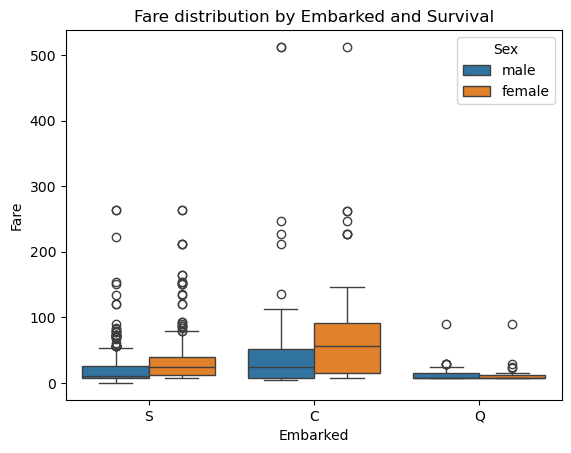

Median Fare by Survival and Sex:
Embarked  Sex   
C         female    56.92920
          male      24.00000
Q         female     7.76875
          male       7.75000
S         female    24.15000
          male      10.50000
Name: Fare, dtype: float64
Embarked  Sex     Pclass
C         female  1          43
                  2           7
                  3          23
          male    1          42
                  2          10
                  3          43
Q         female  1           1
                  2           2
                  3          33
          male    1           1
                  2           1
                  3          39
S         female  1          48
                  2          67
                  3          88
          male    1          79
                  2          97
                  3         265
Name: Fare, dtype: int64


In [51]:
sns.boxplot(x="Embarked", y="Fare", hue="Sex", data=titanic_train)
plt.title("Fare distribution by Embarked and Survival")
plt.show()

# Median Age by Survived and Sex
print("Median Fare by Survival and Sex:")
print(titanic_train.groupby(["Embarked", "Sex"])["Fare"].median())
print(titanic_train.groupby(["Embarked", "Sex", "Pclass"])["Fare"].count())


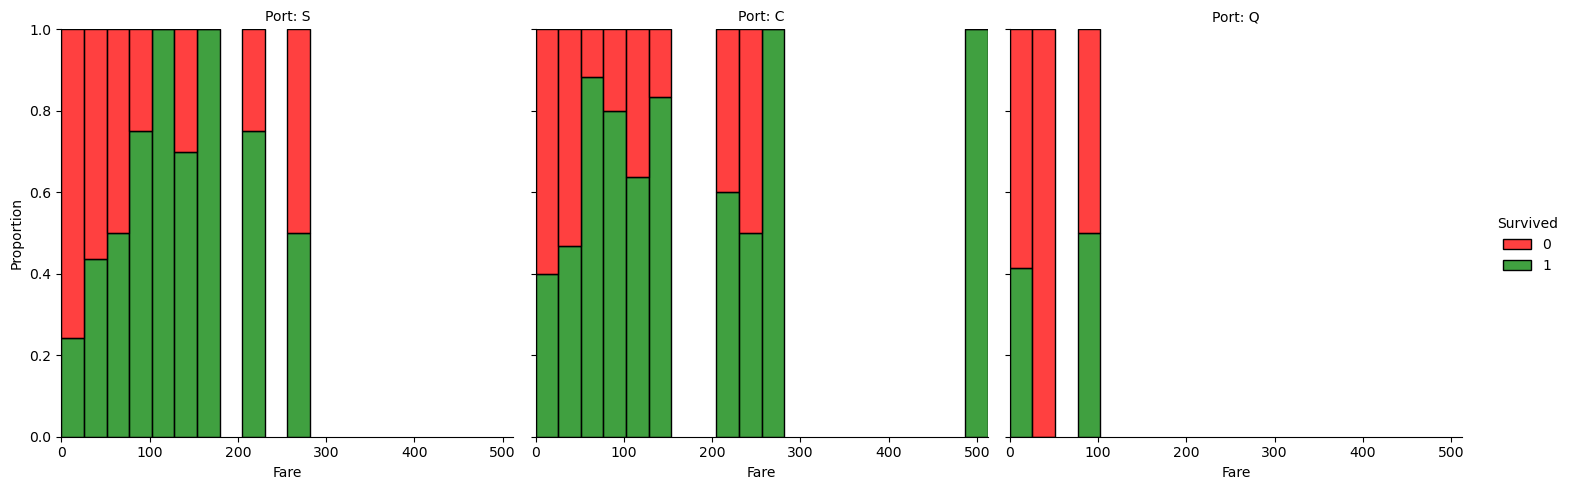

In [52]:
g = sns.displot(
    data=titanic_train,
    x="Fare",
    hue="Survived",
    col="Embarked",
    multiple="fill",
    bins=20,
    palette={0:"red", 1:"green"}
)
g.set_axis_labels("Fare", "Proportion")
g.set_titles("Port: {col_name}")
plt.show()
